### Edited yolov5 object detection for tableware ###
### Dataset self collected - visit https://github.com/ericngin/Object_detection

In [ ]:
# clone Tableware repository
!git clone https://github.com/ericngin/Object_detection

In [ ]:
### Start by connecting gdrive into the google colab ###
### Mount Google Drive for file import ###
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
### install Dependencies, requirements for code to run smoothly ###
%cd /content/gdrive/MyDrive/DL/YOLO_model/yolov5
%pip install -qr requirements.txt  # install dependencies

### check torch if using GPU ###
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

In [4]:
### remove all files in test folder if any ###
import os
import glob

files = glob.glob('/content/Object_detection/twdata_hd/test_hd/*.jpg')
for f in files:
    os.remove(f)

In [5]:
### split whole dataset into train, val and test dataset randomly ###
from utils.datasets import *; autosplit('/content/Object_detection/twdata', weights=(0.7, 0.2, 0.1)) 

100%|██████████| 153/153 [00:00<00:00, 20110.58it/s]

Autosplitting images from /content/Object_detection/twdata


In [ ]:
### this is the model configuration used for our training ###
%cat /content/gdrive/MyDrive/DL/YOLO_model/yolov5/models/yolov5s_tw.yaml

In [ ]:
### this is the YAML file that is loaded into this notebook with tw data ###
%cat /content/Object_detection/tw.yaml

In [ ]:
### check time for training ###
### train using train and val dataset using tw.yaml ###
### train using models - yolov5s config and specific weights - '' or yolo5s.pt or best.pt ###
%%time
%cd /content/gdrive/MyDrive/DL/YOLO_model/yolov5
!python train.py --img 640 --batch 8 --epochs 2 --data '/data/tw.yaml' --cfg ./models/yolov5s_tw.yaml --weights yolov5s.pt --cache --name mv5l_wv5l_1000epochs_set1_hd

In [ ]:
### Start tensorboard ###
### Launch after you have started training ###
### logs save in the folder "runs" ###
%load_ext tensorboard
%tensorboard --logdir runs

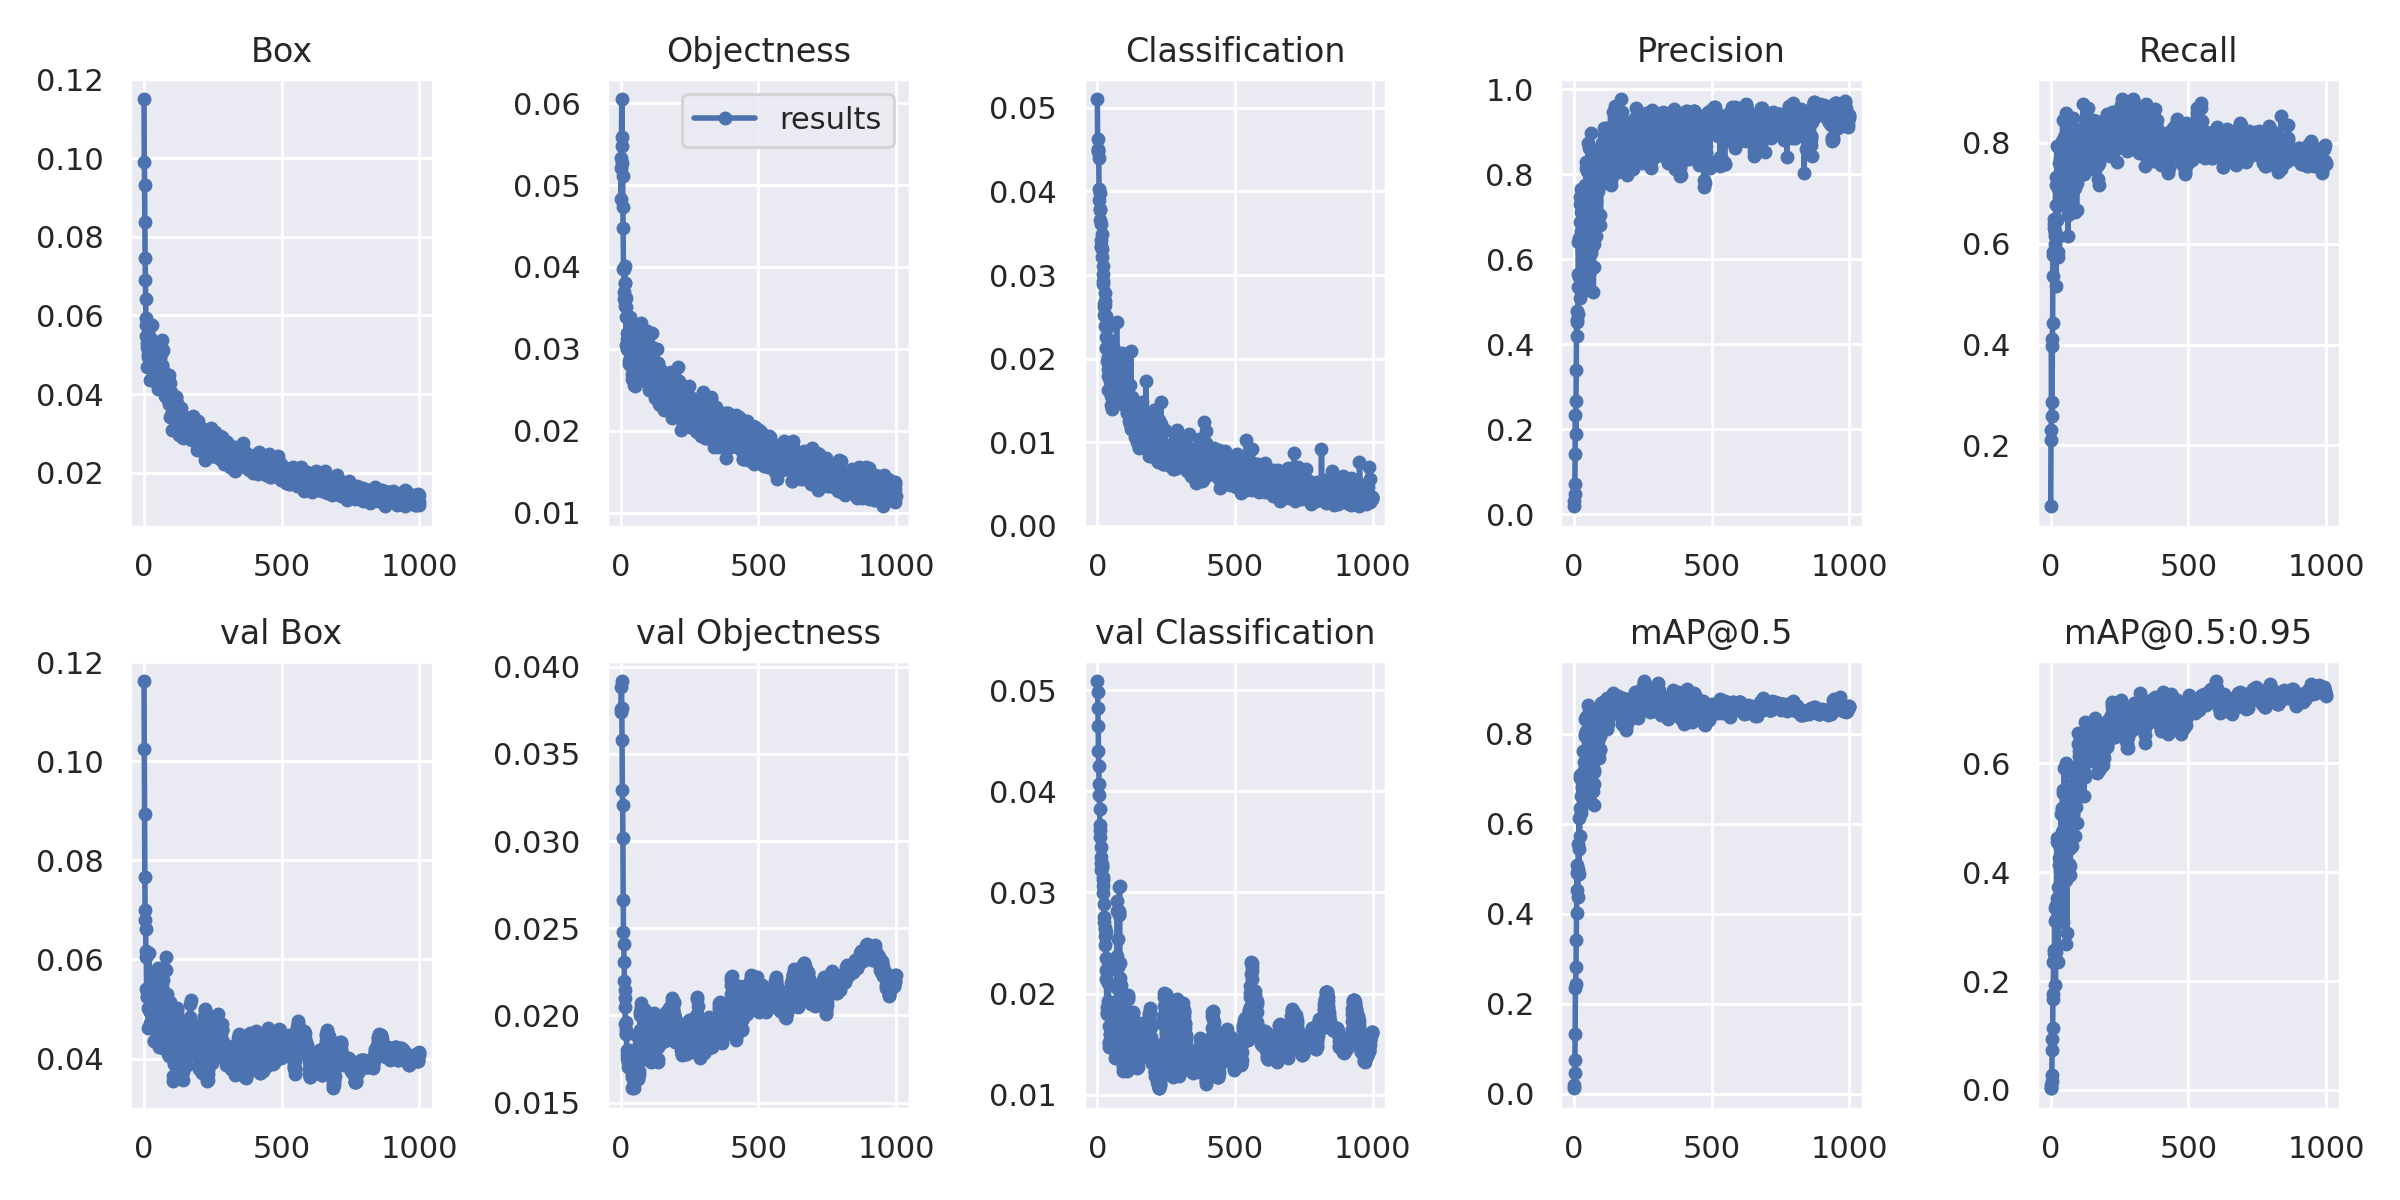

In [ ]:
### output some older school graphs if the tensor board isn't working for whatever reason... ###
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/gdrive/MyDrive/DL/YOLO_model/yolov5/runs/train/mv5l_wv5l_1000epochs_set15/results.png', width=1000)  # view results.png

#from utils.plots import plot_results 
#plot_results(save_dir='runs/train/exp2')  # plot all results*.txt as results.png
#Image(filename='runs/train/exp2/results.png', width=800)

GROUND TRUTH TRAINING DATA:


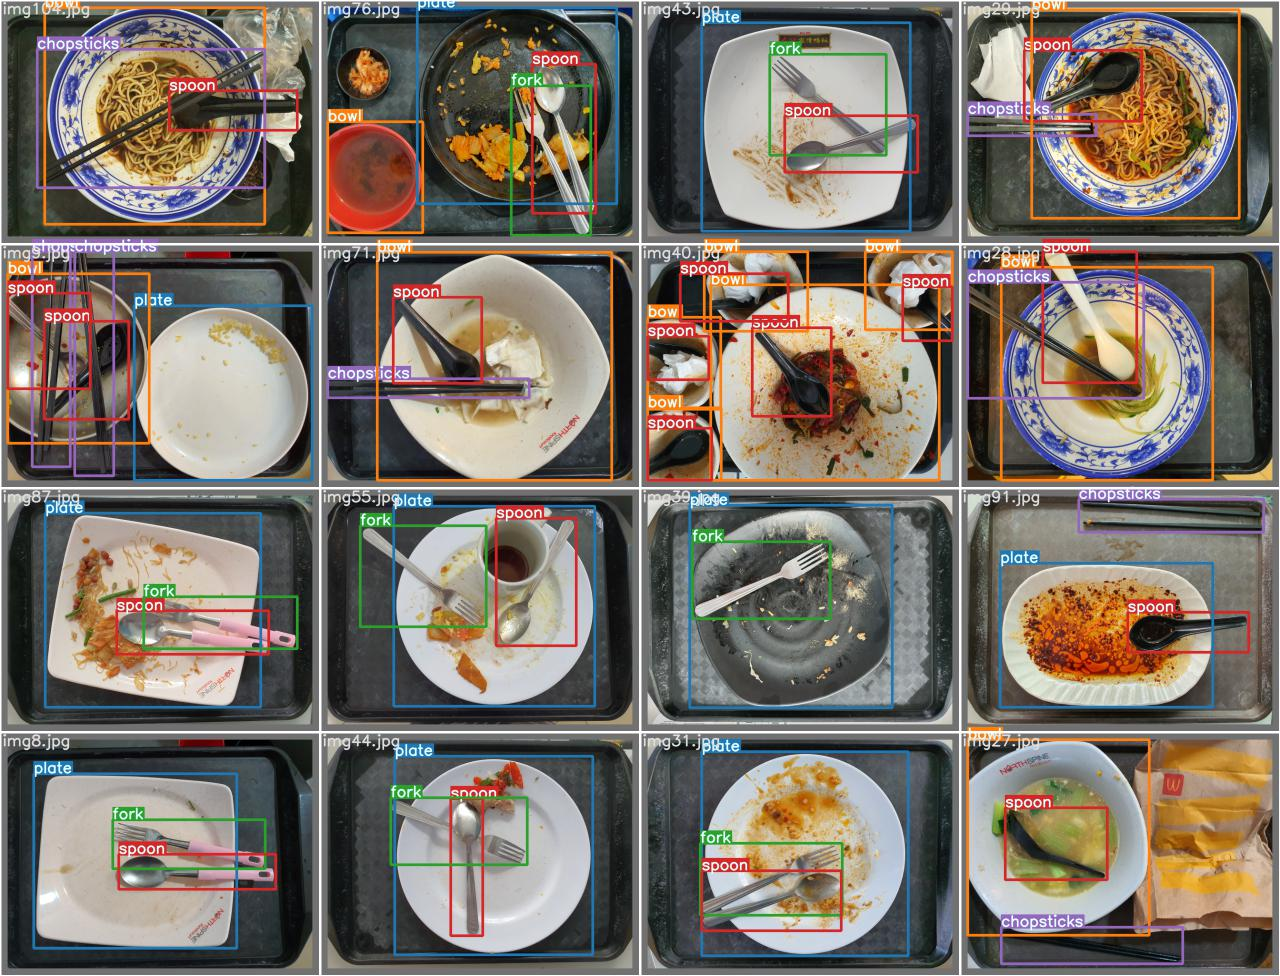

In [ ]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/gdrive/MyDrive/DL/YOLO_model/yolov5/runs/train/mv5l_wv5l_1000epochs_set15/test_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


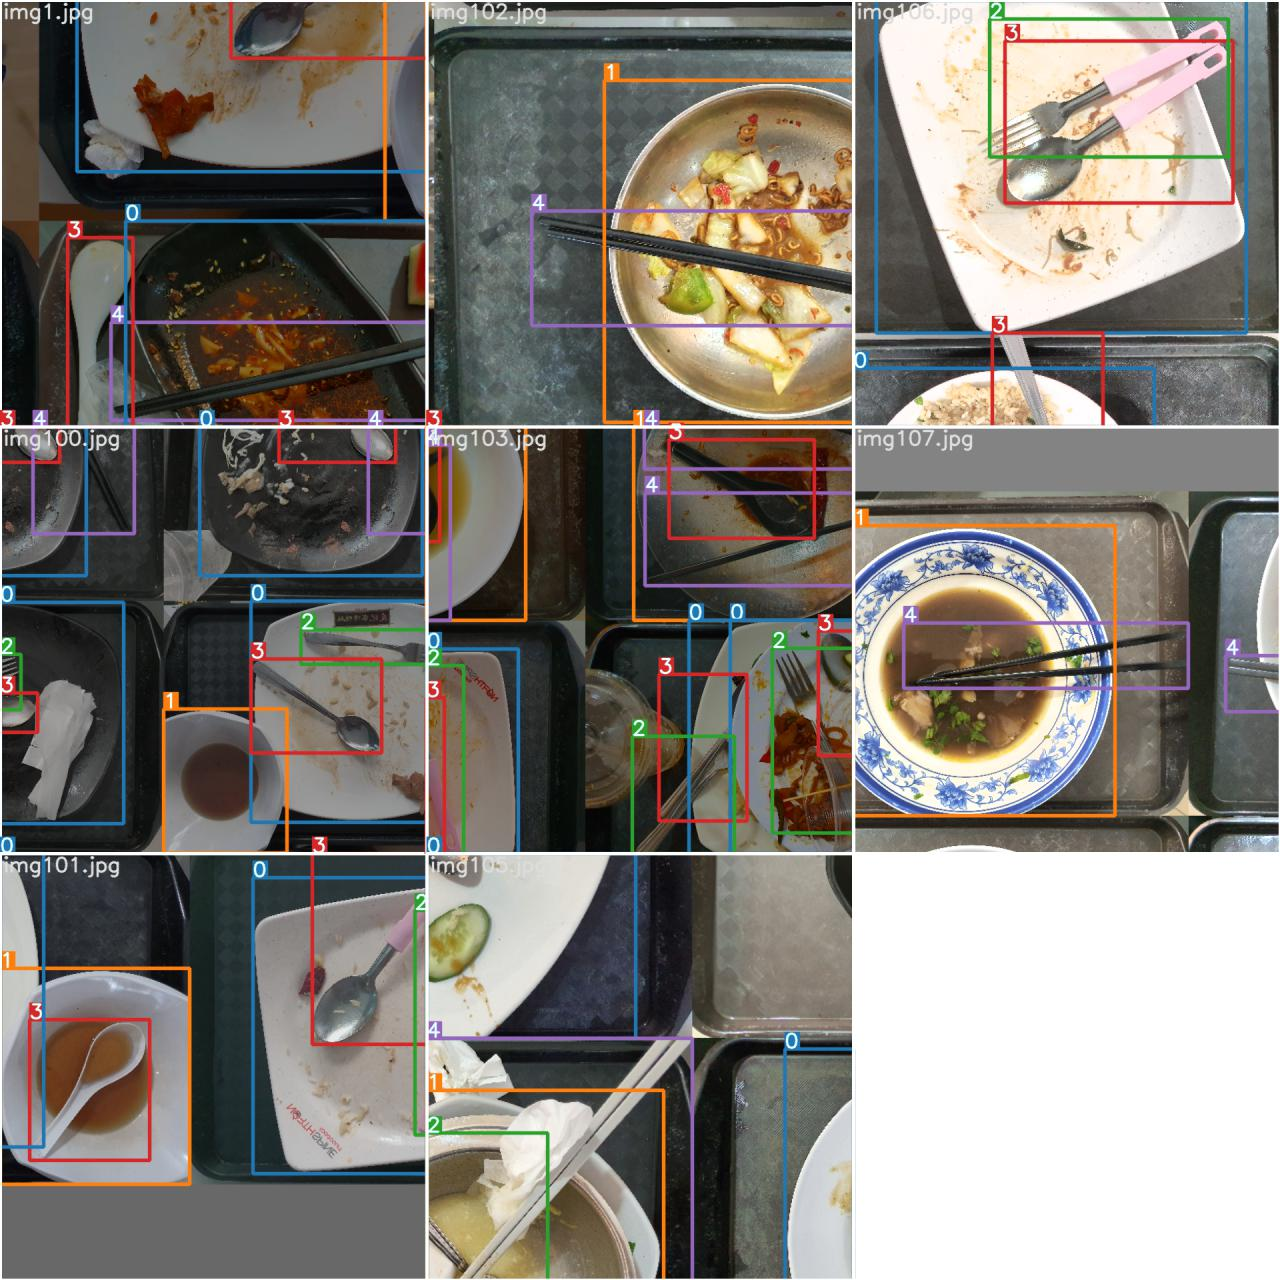

In [ ]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/gdrive/MyDrive/DL/YOLO_model/yolov5/runs/train/mv5l_wv5l_1000epochs_set15/train_batch0.jpg', width=900)

In [12]:
### copy the images specified by the test textfile into test folder ###
import shutil
pic = open("/content/Object_detection/twdata/autosplit_test.txt", mode='r')
lines = pic.readlines()
for line in lines:
  original = line.strip("\n")
  fixed = line[0:33]+'test/'+line[33:]
  target = fixed.strip("\n")
  shutil.copyfile(original, target)

In [ ]:
### trained weights are saved by default in our weights folder ###
%ls runs/

train/


In [ ]:
### check the name of the weights ###
%ls runs/train/mv5l_wv5l_1000epochs_set1_hd/weights

best.pt  last.pt


In [16]:
### using train weights, peform object detection ###
!python detect.py --weights runs/train/mv5l_wv5l_1000epochs_set1_hd5/weights/best.pt --img 640 --conf 0.25 --source /content/Object_detection/twdata/test --name mv5l_wv5l_b_1000epochs_set1_hd_0.25

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='mv5l_wv5l_b_1000epochs_set1_hd_0.25', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/Object_detection/twdata/test', update=False, view_img=False, weights=['runs/train/mv5l_wv5l_1000epochs_set1_hd5/weights/best.pt'])
YOLOv5 🚀 2021-4-1 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7064698 parameters, 0 gradients, 16.4 GFLOPS
image 1/19 /content/Object_detection/twdata/test/img113.jpg: 480x640 Done. (0.010s)
image 2/19 /content/Object_detection/twdata/test/img126.jpg: 480x640 Done. (0.009s)
image 3/19 /content/Object_detection/twdata/test/img13.jpg: 480x640 Done. (0.009s)
image 4/19 /content/Object_detection/twdata/test/img137.jpg: 480x640 Done. (0.009s)
image 5/19 /content/Object_detection/twdata/test/img143.jpg: 480x640 Done. (0.009s)
image 6/19 /content/Object_de

**Results time :)**

In [ ]:
#### display inference on ALL test images ###
#### this looks much better with longer training above ###

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/mv5l_wv5l_b_1000epochs_set1_0.25/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
### export weights to google drive ###
%cp /content/yolov5/runs/train/yolov5s_results/weights/best.pt /content/gdrive/My\ Drive